In [215]:
'C:\\Users\\Dr.Noha\\Downloads\\Employee Lifecycle Data.csv'

'C:\\Users\\Dr.Noha\\Downloads\\Employee Lifecycle Data.csv'

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:\\Users\\Dr.Noha\\Downloads\\Employee Lifecycle Data.csv')
df.head()

,PersonID,Full_Name,Preferred_Name,Login_Name,Email_Address,Phone_Number,Is_Employee,Is_Salesperson,Is_System_User,Is_Permitted_To_Login,Employment_Started_When,Employment_Ended_When,Days_Worked,Version_Source
0,2,Kayla Woodcock,Kayla,kaylaw@wideworldimporters.com,kaylaw@wideworldimporters.com,(415) 555-0102,1,1,1,1,5/31/2016,##############################################...,3232,Current
1,3,Hudson Onslow,Hudson,hudsono@wideworldimporters.com,hudsono@wideworldimporters.com,(415) 555-0102,1,1,1,1,5/31/2016,##############################################...,3232,Current
2,4,Isabella Rupp,Isabella,isabellar@wideworldimporters.com,isabellar@wideworldimporters.com,(415) 555-0102,1,0,1,1,5/31/2016,##############################################...,3232,Current
3,5,Eva Muirden,Eva,evam@wideworldimporters.com,evam@wideworldimporters.com,(415) 555-0102,1,0,1,0,5/31/2016,##############################################...,3232,Current
4,6,Sophia Hinton,Sophia,sophiah@wideworldimporters.com,sophiah@wideworldimporters.com,(415) 555-0102,1,1,1,1,5/31/2016,##############################################...,3232,Current


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PersonID                 211 non-null    int64 
 1   Full_Name                211 non-null    object
 2   Preferred_Name           211 non-null    object
 3   Login_Name               211 non-null    object
 4   Email_Address            211 non-null    object
 5   Phone_Number             211 non-null    object
 6   Is_Employee              211 non-null    int64 
 7   Is_Salesperson           211 non-null    int64 
 8   Is_System_User           211 non-null    int64 
 9   Is_Permitted_To_Login    211 non-null    int64 
 10  Employment_Started_When  211 non-null    object
 11  Employment_Ended_When    211 non-null    object
 12  Days_Worked              211 non-null    int64 
 13  Version_Source           211 non-null    object
dtypes: int64(6), object(8)
memory usage: 23.2+

In [221]:
df.describe()

,PersonID,Is_Employee,Is_Salesperson,Is_System_User,Is_Permitted_To_Login,Days_Worked
count,211.000000,211.0,211.000000,211.0,211.000000,211.000000
mean,11.284360,1.0,0.578199,1.0,0.971564,403.232227
std,5.346534,0.0,0.495021,0.0,0.166610,908.054502
min,2.000000,1.0,0.000000,1.0,0.000000,0.000000
25%,7.000000,1.0,0.000000,1.0,1.000000,19.500000
50%,11.000000,1.0,1.000000,1.0,1.000000,72.000000
75%,15.000000,1.0,1.000000,1.0,1.000000,231.000000
max,20.000000,1.0,1.000000,1.0,1.000000,3232.000000


In [223]:
df.isnull().sum()

PersonID                   0
Full_Name                  0
Preferred_Name             0
Login_Name                 0
Email_Address              0
Phone_Number               0
Is_Employee                0
Is_Salesperson             0
Is_System_User             0
Is_Permitted_To_Login      0
Employment_Started_When    0
Employment_Ended_When      0
Days_Worked                0
Version_Source             0
dtype: int64

In [225]:
df['Employment_Started_When'] = pd.to_datetime(
    df['Employment_Started_When'],
    format='mixed',  # Auto-detect format (e.g., YYYY-MM-DD, DD/MM/YYYY)
    errors='coerce'  # Invalid dates → NaT (NULL)
)

df['Employment_Ended_When'] = pd.to_datetime(
    df['Employment_Ended_When'],
    format='mixed',
    errors='coerce'
)

# Verify the conversion
print("\nData Types After Conversion:")
print(df.dtypes)

print(df)


Data Types After Conversion:
PersonID                            int64
Full_Name                          object
Preferred_Name                     object
Login_Name                         object
Email_Address                      object
Phone_Number                       object
Is_Employee                         int64
Is_Salesperson                      int64
Is_System_User                      int64
Is_Permitted_To_Login               int64
Employment_Started_When    datetime64[ns]
Employment_Ended_When      datetime64[ns]
Days_Worked                         int64
Version_Source                     object
dtype: object
     PersonID       Full_Name Preferred_Name  \
0           2  Kayla Woodcock          Kayla   
1           3   Hudson Onslow         Hudson   
2           4   Isabella Rupp       Isabella   
3           5     Eva Muirden            Eva   
4           6   Sophia Hinton         Sophia   
..        ...             ...            ...   
206         6   Sophia Hinton   

In [227]:
df.isnull().sum()

PersonID                    0
Full_Name                   0
Preferred_Name              0
Login_Name                  0
Email_Address               0
Phone_Number                0
Is_Employee                 0
Is_Salesperson              0
Is_System_User              0
Is_Permitted_To_Login       0
Employment_Started_When     0
Employment_Ended_When      19
Days_Worked                 0
Version_Source              0
dtype: int64

In [229]:
# Display only rows where Employment_Ended_When is null
null_rows = df[df['Employment_Ended_When'].isna()]
print(null_rows)

    PersonID           Full_Name Preferred_Name  \
0          2      Kayla Woodcock          Kayla   
1          3       Hudson Onslow         Hudson   
2          4       Isabella Rupp       Isabella   
3          5         Eva Muirden            Eva   
4          6       Sophia Hinton         Sophia   
5          7           Amy Trefl            Amy   
6          8      Anthony Grosse        Anthony   
7          9      Alica Fatnowna          Alica   
8         10    Stella Rosenhain         Stella   
9         11        Ethan Onslow          Ethan   
10        12      Henry Forlonge          Henry   
11        13  Hudson Hollinworth         Hudson   
12        14           Lily Code           Lily   
13        15           Taj Shand            Taj   
14        16       Archer Lamble         Archer   
15        17          Piper Koch          Piper   
16        18        Katie Darwin          Katie   
17        19           Jai Shand            Jai   
18        20         Jack Potte

## Data Validation

In [232]:
# Flag inconsistent dates
df["Is_Inconsistent"] = df["Employment_Ended_When"] < df["Employment_Started_When"]

# Show problematic rows
print(df[df["Is_Inconsistent"]])

Empty DataFrame
Columns: [PersonID, Full_Name, Preferred_Name, Login_Name, Email_Address, Phone_Number, Is_Employee, Is_Salesperson, Is_System_User, Is_Permitted_To_Login, Employment_Started_When, Employment_Ended_When, Days_Worked, Version_Source, Is_Inconsistent]
Index: []


## Number of current Employees

In [235]:
def get_employee_count(dataframe):
    return (dataframe['Is_Employee'] == 1).sum()    
print(f"Number of employees: {get_employee_count(df)}") 

Number of employees: 211


In [237]:
df['no_longer_an_employee'] = df['Employment_Ended_When'].notna()

print(df[['Full_Name', 'Employment_Ended_When', 'no_longer_an_employee']])

          Full_Name Employment_Ended_When  no_longer_an_employee
0    Kayla Woodcock                   NaT                  False
1     Hudson Onslow                   NaT                  False
2     Isabella Rupp                   NaT                  False
3       Eva Muirden                   NaT                  False
4     Sophia Hinton                   NaT                  False
..              ...                   ...                    ...
206   Sophia Hinton            2016-05-31                   True
207     Eva Muirden            2016-05-31                   True
208   Isabella Rupp            2016-05-31                   True
209   Hudson Onslow            2016-05-31                   True
210  Kayla Woodcock            2016-05-31                   True

[211 rows x 3 columns]


In [239]:
# Create the status column (True for former employees)
df['no_longer_an_employee'] = df['Is_Employee'].eq(1) & df['Employment_Ended_When'].notna()

# Print the status column
print("Employee Status:")
print(df[['Full_Name', 'no_longer_an_employee']])

# Count former employees (corrected counting method)
print("\nNumber of former employees:", df['no_longer_an_employee'].sum())

Employee Status:
          Full_Name  no_longer_an_employee
0    Kayla Woodcock                  False
1     Hudson Onslow                  False
2     Isabella Rupp                  False
3       Eva Muirden                  False
4     Sophia Hinton                  False
..              ...                    ...
206   Sophia Hinton                   True
207     Eva Muirden                   True
208   Isabella Rupp                   True
209   Hudson Onslow                   True
210  Kayla Woodcock                   True

[211 rows x 2 columns]

Number of former employees: 192


## System Sequrity Checks:

In [242]:
## Employees who can log in but are not system users
login_but_not_system = df[(df["Is_Permitted_To_Login"] == True) & (df["Is_System_User"] == False)]
print(f"Employees with Login Access but Not System Users: {len(login_but_not_system)}")

# System users who are no longer employees (security check)
system_users_inactive = df[(df["Is_System_User"] == True) & (df["no_longer_an_employee"] == False)]
print(f"Inactive Employees with System Access: {len(system_users_inactive)}")

Employees with Login Access but Not System Users: 0
Inactive Employees with System Access: 19


In [244]:
def split_phone_number_with_parentheses(df, phone_column):
    df['City_Key'] = df[phone_column].str.extract(r'\((.*?)\)')
    df['Phone_Number_Without_Key'] = df[phone_column].str.replace(r'\(.*?\)\s*', '', regex=True)
    return df
df = split_phone_number_with_parentheses(df.copy(), 'Phone_Number')
print(df[['Phone_Number', 'City_Key', 'Phone_Number_Without_Key']].head())

     Phone_Number City_Key Phone_Number_Without_Key
0  (415) 555-0102      415                 555-0102
1  (415) 555-0102      415                 555-0102
2  (415) 555-0102      415                 555-0102
3  (415) 555-0102      415                 555-0102
4  (415) 555-0102      415                 555-0102


In [246]:
print(df['City_Key'].unique())
print("Number of unique cities:", df['City_Key'].nunique())

['415']
Number of unique cities: 1


In [248]:
# Calculate days worked (handles NULLs for current employees)
df["Days_Worked"] = (
    (df["Employment_Ended_When"].fillna(pd.Timestamp.now()) - df["Employment_Started_When"])
    .dt.days
    .astype(int)
)

<Axes: >

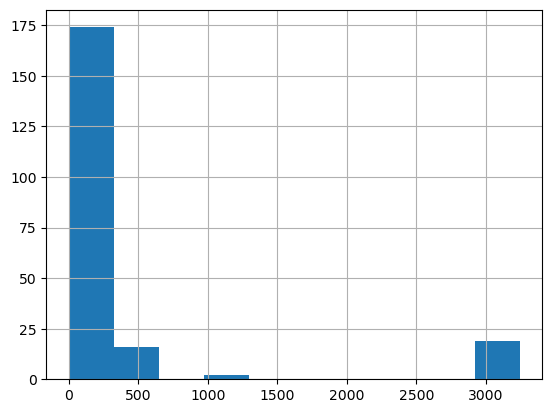

In [250]:
df['Days_Worked'].hist()

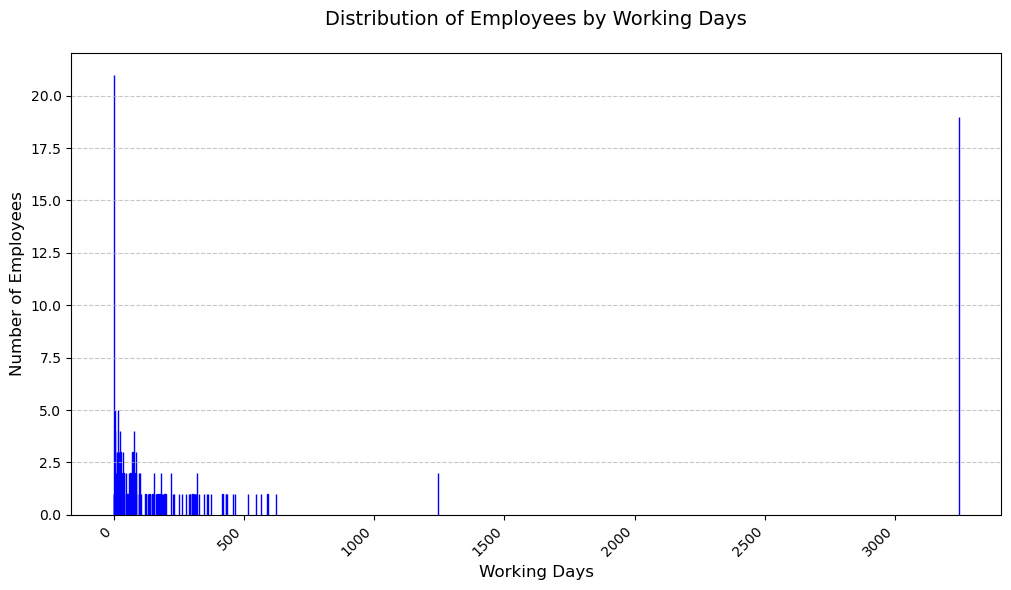

In [252]:
# Count the number of employees per unique "Days_Worked" value
days_worked_distribution = df["Days_Worked"].value_counts().sort_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.bar(days_worked_distribution.index, days_worked_distribution.values, color="skyblue", edgecolor="Blue")
plt.xlabel("Working Days", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.title("Distribution of Employees by Working Days", fontsize=14, pad=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Rotate x-axis labels if too crowded
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

C:\Users\Dr.Noha\AppData\Local\Temp\ipykernel_18828\2807298673.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(


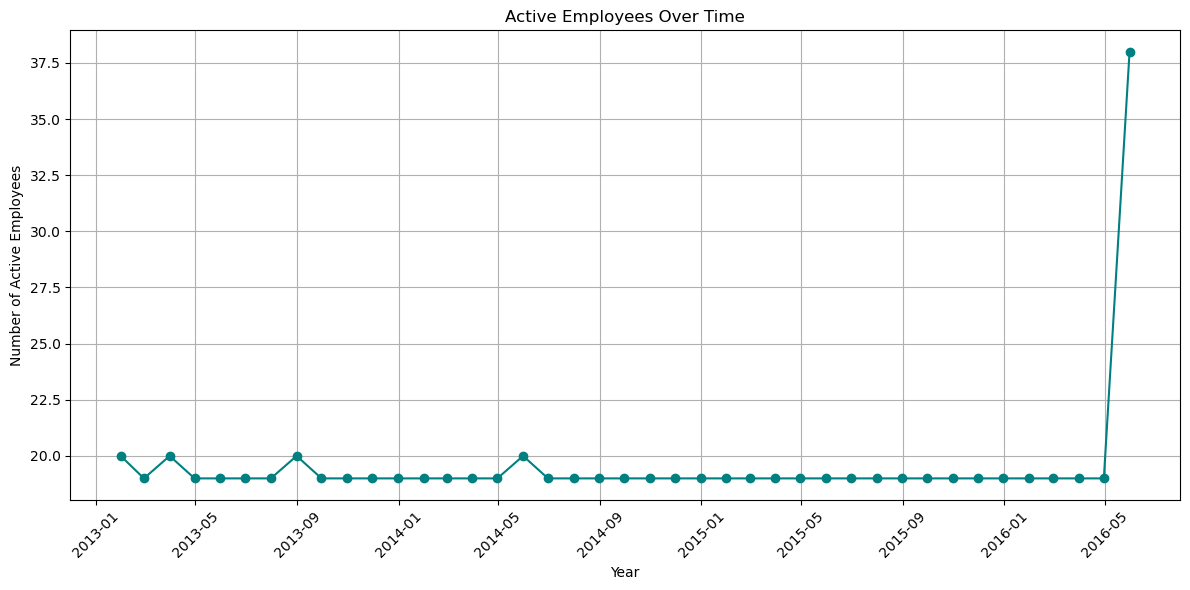

In [254]:
# Count active employees per month
date_range = pd.date_range(
    start=df['Employment_Started_When'].min(),
    end=df['Employment_Ended_When'].max(),
    freq='M'
)
active_counts = [
    ((df['Employment_Started_When'] <= date) & (df['Employment_Ended_When'] >= date)).sum()
    for date in date_range
]

plt.figure(figsize=(12, 6))
plt.plot(date_range, active_counts, marker='o', linestyle='-', color='teal')
plt.title('Active Employees Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Active Employees')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [256]:
##Handle Active Employees

In [258]:
# Calculate tenure in days
df["Tenure_Days"] = (df["Employment_Ended_When"] - df["Employment_Started_When"]).dt.days
print(df[["Employment_Started_When", "Employment_Ended_When", "Tenure_Days"]].head())

  Employment_Started_When Employment_Ended_When  Tenure_Days
0              2016-05-31                   NaT          NaN
1              2016-05-31                   NaT          NaN
2              2016-05-31                   NaT          NaN
3              2016-05-31                   NaT          NaN
4              2016-05-31                   NaT          NaN


In [260]:
from datetime import datetime

# Calculate tenure (handling active employees)
today = pd.to_datetime(datetime.now().date())  # Today's date

df["Tenure_Days"] = (
    (df["Employment_Ended_When"].fillna(today)) - df["Employment_Started_When"]
).dt.days

print(df[["Employment_Started_When", "Employment_Ended_When", "Tenure_Days"]].head())

  Employment_Started_When Employment_Ended_When  Tenure_Days
0              2016-05-31                   NaT         3245
1              2016-05-31                   NaT         3245
2              2016-05-31                   NaT         3245
3              2016-05-31                   NaT         3245
4              2016-05-31                   NaT         3245


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PersonID                  211 non-null    int64         
 1   Full_Name                 211 non-null    object        
 2   Preferred_Name            211 non-null    object        
 3   Login_Name                211 non-null    object        
 4   Email_Address             211 non-null    object        
 5   Phone_Number              211 non-null    object        
 6   Is_Employee               211 non-null    int64         
 7   Is_Salesperson            211 non-null    int64         
 8   Is_System_User            211 non-null    int64         
 9   Is_Permitted_To_Login     211 non-null    int64         
 10  Employment_Started_When   211 non-null    datetime64[ns]
 11  Employment_Ended_When     192 non-null    datetime64[ns]
 12  Days_Worked           

In [264]:
if "Days_Worked" in df.columns and "Tenure_Days" in df.columns:
    # Compare element-wise (returns a boolean Series)
    comparison = df["Days_Worked"] == df["Tenure_Days"]
    
    # Count mismatches (including NaN/NaT as mismatches)
    num_mismatches = (~comparison).sum()
    print(f"Number of mismatched rows: {num_mismatches}")
    
    # Show rows where they differ
    if num_mismatches > 0:
        print("Rows with differences:")
        display(df[~comparison][["Days_Worked", "Tenure_Days"]])
else:
    print("Error: Columns not found")

Number of mismatched rows: 0


##Hiring trends & Attrition rate

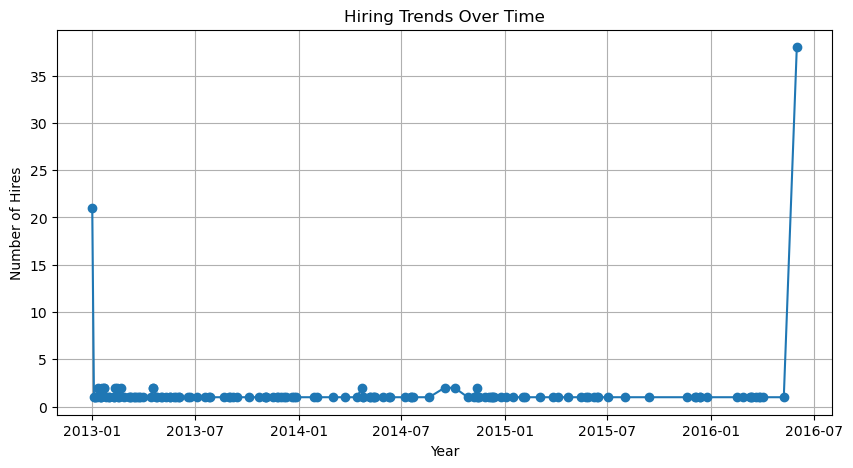

In [267]:
# Hiring trend plot
hiring_trend = df["Employment_Started_When"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(hiring_trend.index, hiring_trend.values, marker="o", linestyle="-")
plt.title("Hiring Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Hires")
plt.grid(True)

# Show the plot
plt.show()

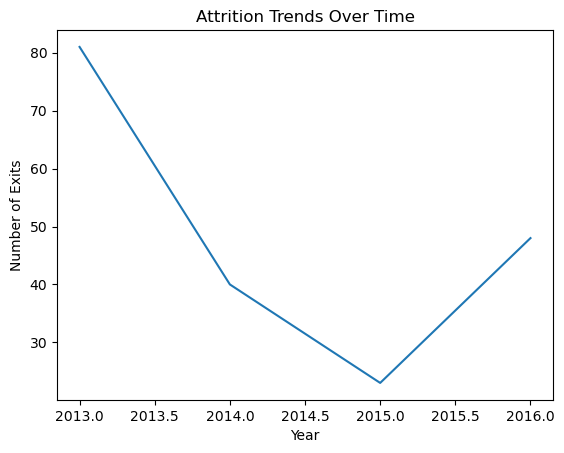

In [269]:
# Attrition rate by year (if employment ended)
if "Employment_Ended_When" in df.columns:
    df["End_Year"] = df["Employment_Ended_When"].dt.year
    attrition_trend = df["End_Year"].value_counts().sort_index()
    attrition_trend.plot(kind="line", title="Attrition Trends Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Exits")
    plt.show()

## percentage of sales-persons to total employess:

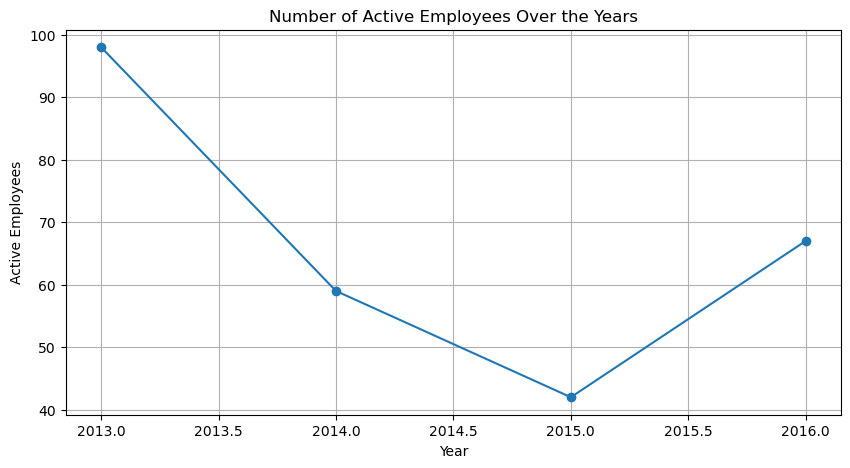

In [272]:
# Extract the range of years from the dataset
years = range(df["Employment_Started_When"].min().year, df["Employment_Ended_When"].max().year + 1)

# Calculate active employees per year
active_employees = {year: df[(df["Employment_Started_When"] <= pd.Timestamp(year, 12, 31)) &
                             ((df["Employment_Ended_When"].isna()) | (df["Employment_Ended_When"] > pd.Timestamp(year, 1, 1)))].shape[0]
                    for year in years}

# Convert to a DataFrame for plotting
active_employees_df = pd.DataFrame(list(active_employees.items()), columns=["Year", "Active Employees"])

# Plot the active employees trend
plt.figure(figsize=(10, 5))
plt.plot(active_employees_df["Year"], active_employees_df["Active Employees"], marker="o", linestyle="-")
plt.title("Number of Active Employees Over the Years")
plt.xlabel("Year")
plt.ylabel("Active Employees")
plt.grid(True)
plt.show()

In [274]:
if 'Is_Salesperson' in df.columns:
    # Calculate counts
    total_employees = len(df)
    salespersons = df['Is_Salesperson'].sum() 
    
    # Calculate percentage
    salesperson_percentage = (salespersons / total_employees) * 100
    
    print(f"Salespersons: {salespersons}")
    print(f"Total Employees: {total_employees}")
    print(f"Percentage of Salespersons: {salesperson_percentage:.2f}%")
else:
    print("Error: 'Is_Salesperson' column not found in DataFrame")

Salespersons: 122
Total Employees: 211
Percentage of Salespersons: 57.82%


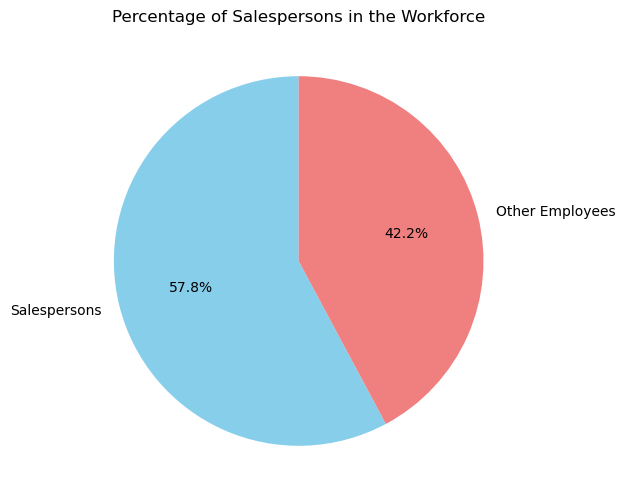

In [276]:
labels = ["Salespersons", "Other Employees"]
values = [salespersons, total_employees - salespersons]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["skyblue", "lightcoral"], startangle=90)
plt.title("Percentage of Salespersons in the Workforce")
plt.show()
